In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import global_params as G
plt.rcParams['figure.figsize'] = G.SMALL_FIG

In [3]:
import numpy as np
from scipy import linalg
from scipy import signal

np.set_printoptions(precision=4, suppress=True)

In [4]:
from utilities import db
from receiver import quantalph

## Least Squares

In [5]:
m = 1000 # Num symbols
noise_std = 0. # Std deviation for AWGN
alphabet = np.array([-1, 1])
channel = np.array([0.5, 1, -0.6])

symbols = np.random.choice(alphabet, m)
noise = noise_std*np.random.randn(m)
received = signal.lfilter(channel, 1, symbols)  + noise

In [6]:
n = 3 # num taps = 1 + n
delay = 2

p = len(received) - delay # tx symbols to consider
R = linalg.toeplitz(received[np.arange(n, p)], received[np.arange(n, -1, -1)])
S = symbols[n-delay:p-delay] # Since this is a training sequence, it is known at receiver
f = linalg.inv(R.T@R)@R.T@S
Jmin = S.T@S - S.T@R@linalg.inv(R.T@R)@R.T@S
y = signal.lfilter(f, 1, received)
decisions = quantalph(y, alphabet)
err = 0.5*np.sum(np.abs(decisions[delay:] - symbols[:m-delay]))

print(f'Delay = {delay}, Jmin = {Jmin:.1f}, errors = {err}, equalizer = {f}')

Delay = 2, Jmin = 31.1, errors = 0.0, equalizer = [-0.2807  0.647   0.3051  0.1324]


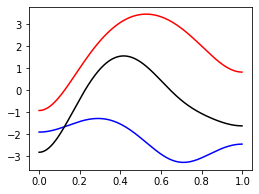

In [7]:
w, h_channel = signal.freqz(channel)
w, h_eq = signal.freqz(f)
w, h_combined = signal.freqz(np.convolve(channel, f))
plt.plot(w/np.pi, db(h_channel), 'r');
plt.plot(w/np.pi, db(h_eq), 'b');
plt.plot(w/np.pi, db(h_combined), 'k');